In [46]:
#To predict the closing price of a stock market we have decided to use
#regression because the stock market price is a contiouns value.  
#If we wanted to check if the stock market price would go up or down, 
#the next day, we would use classification.


In [47]:
#import libraries 
from sklearn.svm import SVR
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [48]:
url = 'https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment2-machinelearning/TSLA.csv'


In [49]:
df = pd.read_csv(url)

In [50]:
df = df.tail(30)

print(df) 

            Date        Open        High         Low       Close   Adj Close  \
2815  2021-09-02  734.500000  740.969971  730.539978  732.390015  732.390015   
2816  2021-09-03  732.250000  734.000000  724.200012  733.570007  733.570007   
2817  2021-09-07  740.000000  760.200012  739.260010  752.919983  752.919983   
2818  2021-09-08  761.580017  764.450012  740.770020  753.869995  753.869995   
2819  2021-09-09  753.409973  762.099976  751.630005  754.859985  754.859985   
2820  2021-09-10  759.599976  762.609985  734.520020  736.270020  736.270020   
2821  2021-09-13  740.210022  744.780029  708.849976  743.000000  743.000000   
2822  2021-09-14  742.570007  754.469971  736.400024  744.489990  744.489990   
2823  2021-09-15  745.000000  756.859985  738.359985  755.830017  755.830017   
2824  2021-09-16  752.830017  758.909973  747.609985  756.989990  756.989990   
2825  2021-09-17  757.150024  761.039978  750.000000  759.489990  759.489990   
2826  2021-09-20  734.559998  742.000000

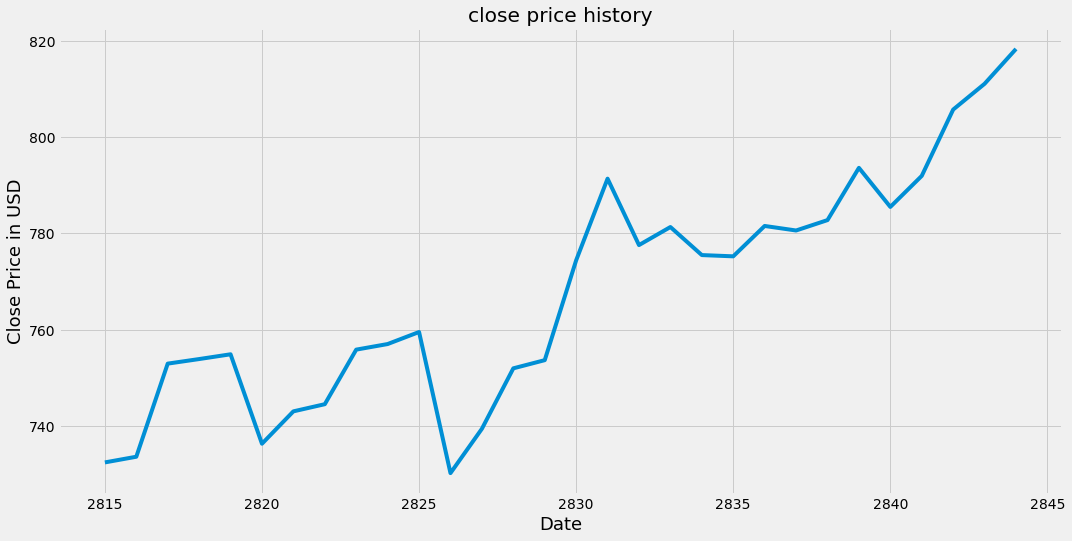

In [51]:
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price in USD', fontsize=18)
plt.show()

In [52]:
#save last row to compare
lastPrice = df.tail(1)
lastPrice

,Date,Open,High,Low,Close,Adj Close,Volume
2844,2021-10-14,815.48999,820.25,813.349976,818.320007,818.320007,12203200


In [53]:
df = df.head(len(df)-1)

df

,Date,Open,High,Low,Close,Adj Close,Volume
2815,2021-09-02,734.500000,740.969971,730.539978,732.390015,732.390015,12777300
2816,2021-09-03,732.250000,734.000000,724.200012,733.570007,733.570007,15246100
2817,2021-09-07,740.000000,760.200012,739.260010,752.919983,752.919983,20039800
2818,2021-09-08,761.580017,764.450012,740.770020,753.869995,753.869995,18793000
2819,2021-09-09,753.409973,762.099976,751.630005,754.859985,754.859985,14077700
2820,2021-09-10,759.599976,762.609985,734.520020,736.270020,736.270020,15114300
2821,2021-09-13,740.210022,744.780029,708.849976,743.000000,743.000000,22952500
2822,2021-09-14,742.570007,754.469971,736.400024,744.489990,744.489990,18524900
2823,2021-09-15,745.000000,756.859985,738.359985,755.830017,755.830017,15357700
2824,2021-09-16,752.830017,758.909973,747.609985,756.989990,756.989990,13923400


In [54]:
days = list()
adj_close_prices = list()

In [55]:
df_days = df.loc[:, 'Date']
df_adj_close = df.loc[:, 'Adj Close']

In [56]:
# create dataset for dates and close prices.
for day in df_days:
    days.append([int(day.split('-')[2])])
for adj_close_price in df_adj_close: 
    adj_close_prices.append(float(adj_close_price))

In [57]:
days

[[2],
 [3],
 [7],
 [8],
 [9],
 [10],
 [13],
 [14],
 [15],
 [16],
 [17],
 [20],
 [21],
 [22],
 [23],
 [24],
 [27],
 [28],
 [29],
 [30],
 [1],
 [4],
 [5],
 [6],
 [7],
 [8],
 [11],
 [12],
 [13]]

In [58]:
#close prices 
adj_close_prices

[732.390015,
 733.570007,
 752.919983,
 753.869995,
 754.859985,
 736.27002,
 743.0,
 744.48999,
 755.830017,
 756.98999,
 759.48999,
 730.169983,
 739.380005,
 751.940002,
 753.640015,
 774.390015,
 791.359985,
 777.559998,
 781.309998,
 775.47998,
 775.219971,
 781.530029,
 780.590027,
 782.75,
 793.609985,
 785.48999,
 791.940002,
 805.719971,
 811.080017]

In [59]:
rbf_svr = SVR(kernel='rbf', C=1000.0, degree=0.85)
rbf_svr.fit(days, adj_close_prices)

SVR(C=1000.0, degree=0.85)

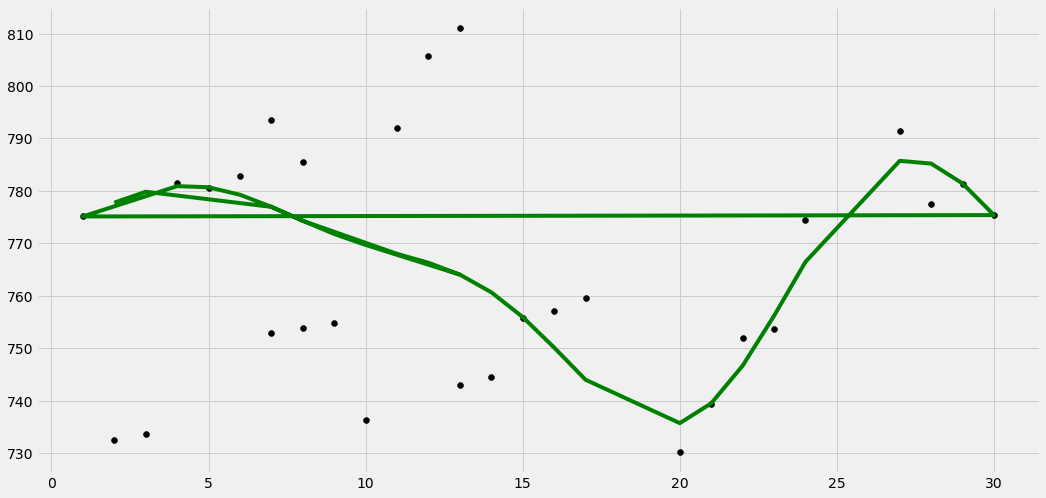

In [60]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF modell')

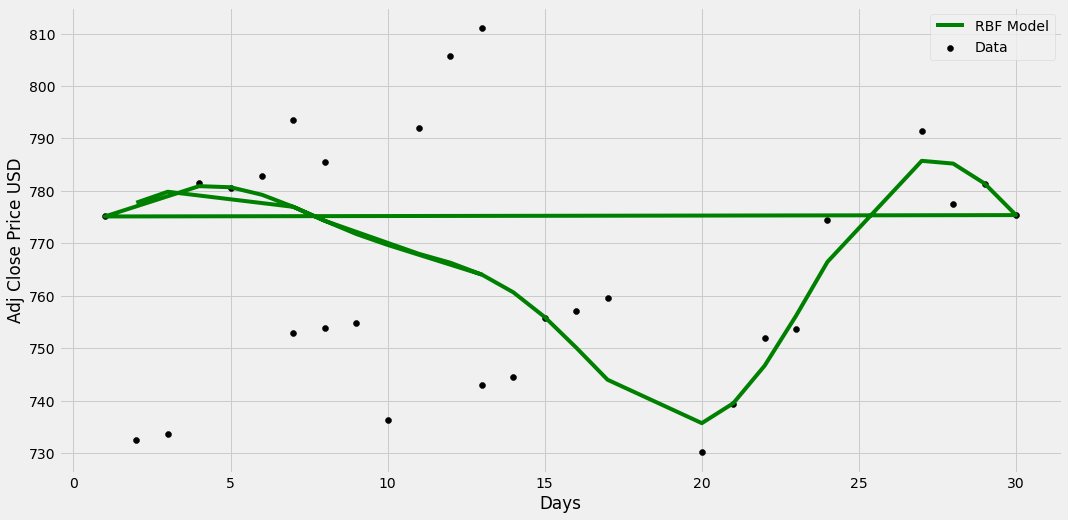

In [61]:
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label = 'Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label = 'RBF Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price USD')
plt.legend()
plt.show()

In [67]:
#predicted price
day = [[13]]
print(rbf_svr.predict(day))

[764.02378728]


In [74]:
#actual price 
print(lastPrice)

            Date       Open    High         Low       Close   Adj Close  \
2844  2021-10-14  815.48999  820.25  813.349976  818.320007  818.320007   

        Volume  
2844  12203200  
